In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier



In [213]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [214]:
data = pd.read_csv('drug200.csv',index_col=0) 
data


,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
23,F,HIGH,HIGH,25.355,drugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...
56,F,LOW,HIGH,11.567,drugC
16,M,LOW,HIGH,12.006,drugC
52,M,NORMAL,HIGH,9.894,drugX


In [215]:
data.info() #This allows us to see that there are 2000 entries, but in #4 there are 1965 Non-Null entries which means
                    #there are 35 null entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 23 to 40
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          200 non-null    object 
 1   BP           200 non-null    object 
 2   Cholesterol  200 non-null    object 
 3   Na_to_K      200 non-null    float64
 4   Drug         200 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.4+ KB


In [216]:
from sklearn.preprocessing import LabelEncoder

data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['BP'] = LabelEncoder().fit_transform(data['BP'])
data['Cholesterol'] = LabelEncoder().fit_transform(data['Cholesterol'])
data['Drug'] = LabelEncoder().fit_transform(data['Drug'])


In [217]:
features_name = ["Sex", "BP", "Cholesterol", "Na_to_K"]
target_name = ["Drug"]
features = data[features_name]
target = data[target_name]


In [218]:
features

,Sex,BP,Cholesterol,Na_to_K
Age,,,,
23,0,0,0,25.355
47,1,1,0,13.093
47,1,1,0,10.114
28,0,2,0,7.798
61,0,1,0,18.043
...,...,...,...,...
56,0,1,0,11.567
16,1,1,0,12.006
52,1,2,0,9.894


### Sex vs Drug


In [219]:
X = features.values
y = target.values.reshape(-1,1)

In [220]:
X_choice = features["Sex"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_choice, y, test_size=0.3, random_state=2)

[[ 0  0  0  0  8]
 [ 0  0  0  0  4]
 [ 0  0  0  0  3]
 [ 0  0  0  0 12]
 [ 0  0  0  0 33]]


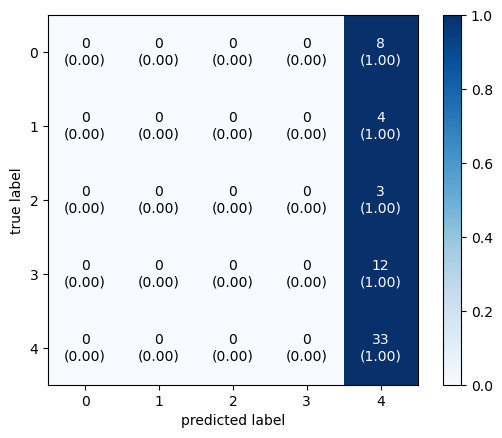

In [221]:
tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
y_pred = tree.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [222]:
print (classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        12
           4       0.55      1.00      0.71        33

    accuracy                           0.55        60
   macro avg       0.11      0.20      0.14        60
weighted avg       0.30      0.55      0.39        60



C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.55

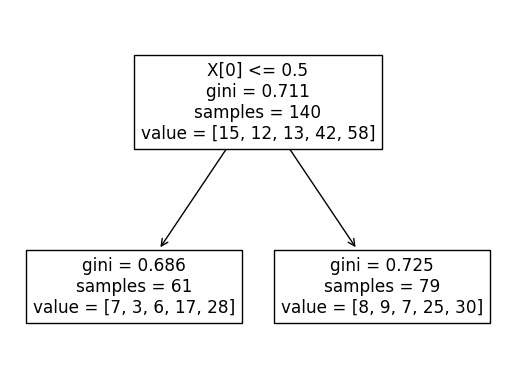

In [223]:
plot_tree(tree)
tree.score(X_test,y_test)

### BP vs Drug


In [224]:
X = features.values
y = target.values.reshape(-1,1)

In [225]:
X_choice = features["BP"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_choice, y, test_size=0.3, random_state=21)

[[ 0  0  0  0  8]
 [ 0  0  0  0  7]
 [ 0  0  0  0  3]
 [ 0  0  0 12  3]
 [ 0  0  0  5 22]]


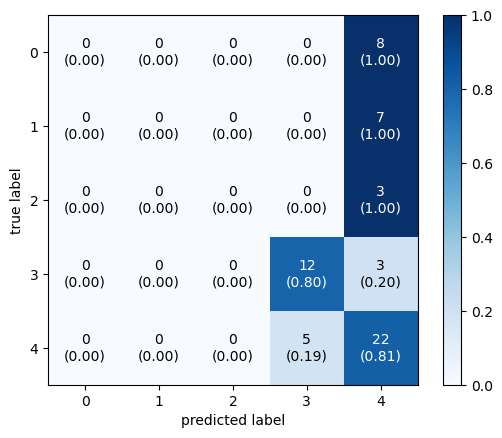

In [226]:
tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
y_pred = tree.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [227]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.71      0.80      0.75        15
           4       0.51      0.81      0.63        27

    accuracy                           0.57        60
   macro avg       0.24      0.32      0.28        60
weighted avg       0.41      0.57      0.47        60



C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5666666666666667

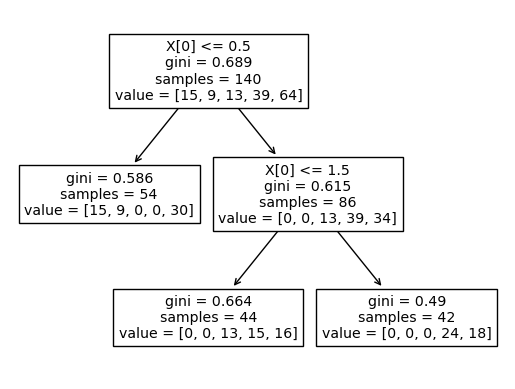

In [228]:
plot_tree(tree)
tree.score(X_test,y_test)

### Cholesterol vs Drug


In [229]:
X = features.values
y = target.values.reshape(-1,1)

In [230]:
X_choice = features["Cholesterol"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_choice, y, test_size=0.3, random_state=2)

[[ 0  0  0  0  8]
 [ 0  0  0  0  4]
 [ 0  0  0  0  3]
 [ 0  0  0  0 12]
 [ 0  0  0  0 33]]


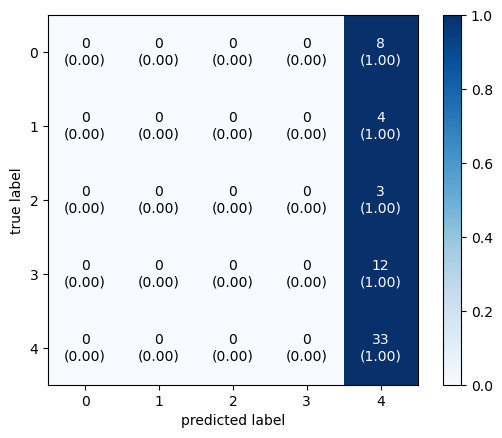

In [231]:
tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
y_pred = tree.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [232]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        12
           4       0.55      1.00      0.71        33

    accuracy                           0.55        60
   macro avg       0.11      0.20      0.14        60
weighted avg       0.30      0.55      0.39        60



C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.55

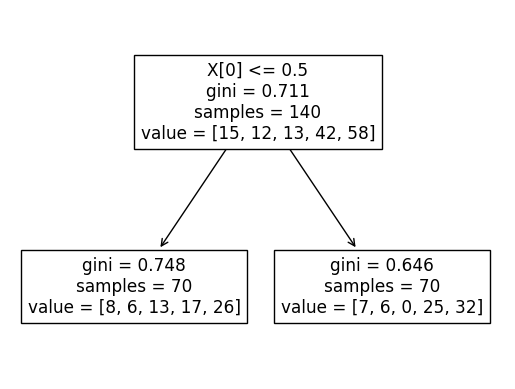

In [233]:
plot_tree(tree)
tree.score(X_test,y_test)

### Na_to_K vs Drug


In [234]:
X = features.values
y = target.values.reshape(-1,1)

In [235]:
X_choice = features["Na_to_K"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_choice, y, test_size=0.3, random_state=0)

[[ 0  0  0  5  0]
 [ 0  0  0  3  0]
 [ 0  0  0  4  0]
 [ 1  0  0 17  0]
 [ 0  0  0  0 30]]


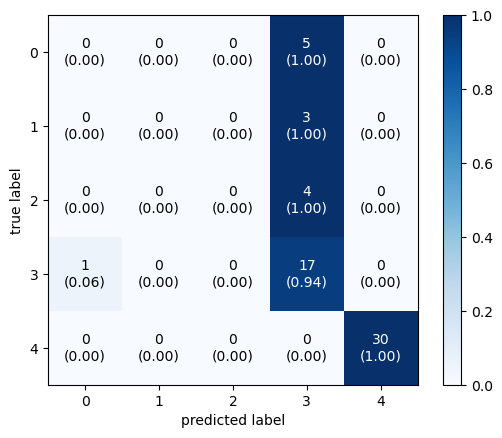

In [236]:
tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
y_pred = tree.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [237]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.59      0.94      0.72        18
           4       1.00      1.00      1.00        30

    accuracy                           0.78        60
   macro avg       0.32      0.39      0.34        60
weighted avg       0.68      0.78      0.72        60



C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7833333333333333

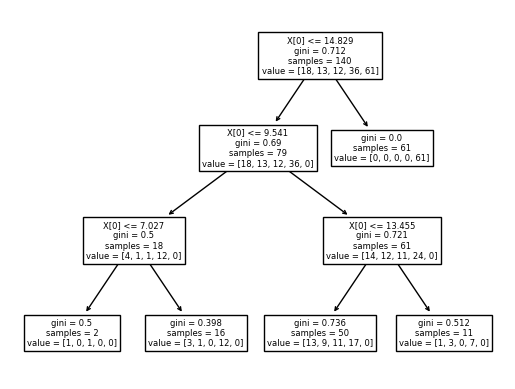

In [238]:
plot_tree(tree)
tree.score(X_test,y_test)

### Training All Features 


In [239]:
X = features.values
y = target.values.reshape(-1,1)

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[[ 6  1  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]


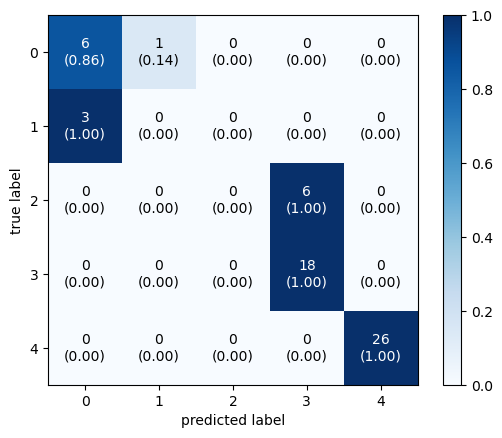

In [241]:
tree_all_features = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_all_features.fit(X_train, y_train)
y_pred = tree_all_features.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [242]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.83        60
   macro avg       0.48      0.57      0.52        60
weighted avg       0.74      0.83      0.78        60



C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.625, 0.875, 'X[3] <= 14.829\ngini = 0.692\nsamples = 140\nvalue = [16, 13, 10, 36, 65]'),
 Text(0.5, 0.625, 'X[1] <= 0.5\ngini = 0.676\nsamples = 75\nvalue = [16, 13, 10, 36, 0]'),
 Text(0.25, 0.375, 'X[3] <= 13.197\ngini = 0.495\nsamples = 29\nvalue = [16, 13, 0, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.454\nsamples = 23\nvalue = [15, 8, 0, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5, 0, 0, 0]'),
 Text(0.75, 0.375, 'X[1] <= 1.5\ngini = 0.34\nsamples = 46\nvalue = [0, 0, 10, 36, 0]'),
 Text(0.625, 0.125, 'gini = 0.499\nsamples = 21\nvalue = [0, 0, 10, 11, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 65\nvalue = [0, 0, 0, 0, 65]')]

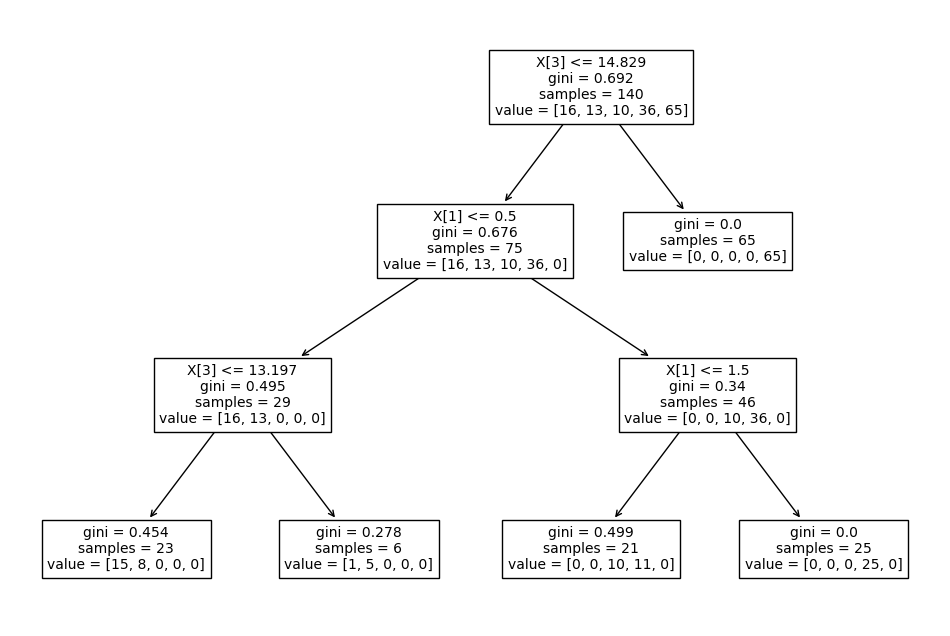

In [243]:
fig, ax = plt.subplots(figsize=(12,8))
plot_tree(tree_all_features, fontsize = 10)#with font size

In [244]:
tree_all_features.score(X_test, y_test)

0.8333333333333334

### Tunning the hyperparameter with GridSearchCV 


In [245]:
from sklearn.model_selection import GridSearchCV

[[ 7  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]


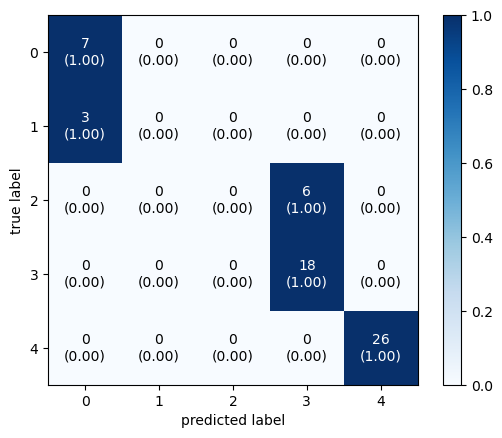

In [246]:
param_grid = {'max_leaf_nodes': range(2,50)}
grid = GridSearchCV(tree_all_features, param_grid, cv=10)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [247]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.85        60
   macro avg       0.49      0.60      0.54        60
weighted avg       0.74      0.85      0.79        60



C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.6, 0.8333333333333334, 'X[3] <= 14.829\ngini = 0.692\nsamples = 140\nvalue = [16, 13, 10, 36, 65]'),
 Text(0.4, 0.5, 'X[1] <= 0.5\ngini = 0.676\nsamples = 75\nvalue = [16, 13, 10, 36, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.495\nsamples = 29\nvalue = [16, 13, 0, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.34\nsamples = 46\nvalue = [0, 0, 10, 36, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 65\nvalue = [0, 0, 0, 0, 65]')]

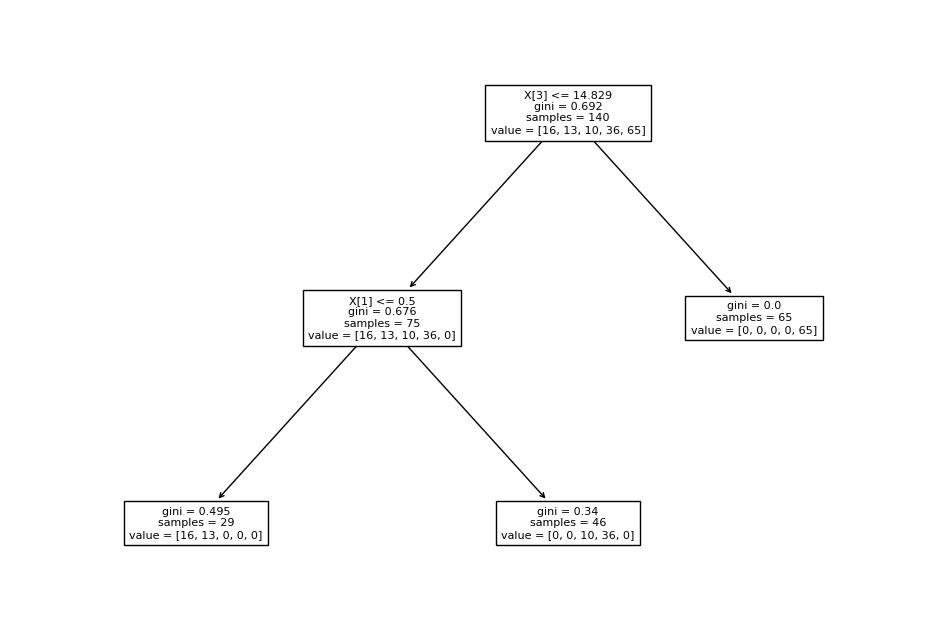

In [248]:
fig, ax = plt.subplots(figsize=(12,8))
plot_tree(grid.best_estimator_, fontsize = 8) #The tree seems to be the same as the one in the earlier question 2

In [249]:
print(f"The best set of parameters is: "
      f"{grid.best_params_}")
print(f"The best score is: "
      f"{grid.best_score_}")

The best set of parameters is: {'max_leaf_nodes': 3}
The best score is: 0.8357142857142856


### Modeled using KNN


### All Features


In [250]:
X = features.values
y = target.values

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.90


C:\Users\pokem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### KNN Sex vs Drug


In [252]:
X = features.iloc[:, 0].values.reshape(-1, 1)
y = target.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)


knn_sex = KNeighborsClassifier(n_neighbors=5)
knn_sex.fit(X_train, y_train)
accuracy_sex = knn_sex.score(X_test, y_test)

print(f"Accuracy for Sex feature: {accuracy_sex}")

Accuracy for Sex feature: 0.4166666666666667


### KNN BP vs Drug


In [253]:
X = features.iloc[:, 1].values.reshape(-1, 1)
y = target.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=21)


knn_bp = KNeighborsClassifier(n_neighbors=5)
knn_bp.fit(X_train, y_train)
accuracy_bp = knn_bp.score(X_test, y_test)

print(f"Accuracy for BP feature: {accuracy_bp}")

Accuracy for BP feature: 0.5666666666666667


### KNN Cholesterol vs Drug


In [254]:
X = features.iloc[:, 2].values.reshape(-1, 1)
y = target.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=5)


knn_chol = KNeighborsClassifier(n_neighbors=5)
knn_chol.fit(X_train, y_train)
accuracy_chol = knn_chol.score(X_test, y_test)

print(f"Accuracy for Cholesterol feature: {accuracy_chol}")

Accuracy for Cholesterol feature: 0.5166666666666667


### KNN Na_to_K vs Drug


In [255]:
X = features.iloc[:, 3].values.reshape(-1, 1)
y = target.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=2)


knn_na_k = KNeighborsClassifier(n_neighbors=5)
knn_na_k.fit(X_train, y_train)
accuracy_na_k = knn_na_k.score(X_test, y_test)

print(f"Accuracy for Na to K feature: {accuracy_na_k}")

Accuracy for Na to K feature: 0.7666666666666667


## Threefold Validation

In [261]:
X = features.values
y = target.values.ravel()
X_trainval, X_test_vali, y_trainval, y_test_vali = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)
val_scores = []
neighbors = np.arange(1, 15, 1)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))
knnvalidation = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knnvalidation.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knnvalidation.score(X_test_vali, y_test_vali)))

best validation score: 0.842
best n_neighbors: 1
test-set score: 0.780


## Cross validation 

In [262]:
from sklearn.model_selection import cross_val_score
X_train, X_test_cross, y_train, y_test_cross = train_test_split(X, y)
cross_val_scores = []
neighbors = np.arange(1, 15, 1)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))
knncross = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knncross.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knncross.score(X_test_cross, y_test_cross)))

best cross-validation score: 0.880
best n_neighbors: 11
test-set score: 0.840


## Plotting of Three fold vs Cross validation 

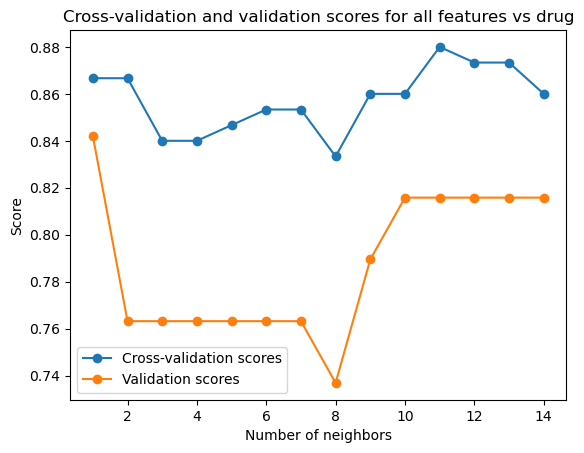

In [263]:
fig, ax = plt.subplots()
ax.plot(neighbors, cross_val_scores, '-o', label='Cross-validation scores')
ax.plot(neighbors, val_scores, '-o', label='Validation scores')
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Score')
ax.set_title('Cross-validation and validation scores for all features vs drug')
ax.legend()
plt.show()

## Metrics for Threefold Validation

[[ 2  4  0  0  0]
 [ 2  2  0  0  0]
 [ 2  0  4  2  1]
 [ 0  0  0 10  0]
 [ 0  0  0  0 21]]


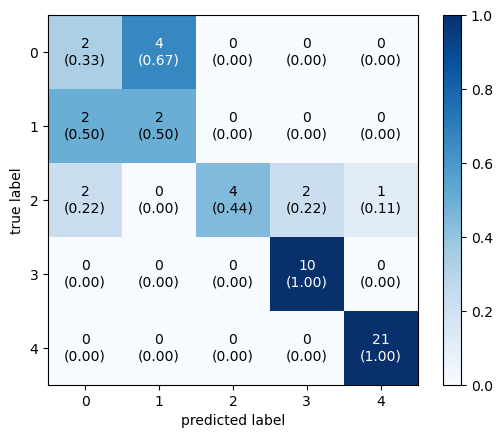

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.33      0.50      0.40         4
           2       1.00      0.44      0.62         9
           3       0.83      1.00      0.91        10
           4       0.95      1.00      0.98        21

    accuracy                           0.78        50
   macro avg       0.69      0.66      0.65        50
weighted avg       0.81      0.78      0.77        50



In [264]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred1 = knnvalidation.predict(X_test_vali)
confusion_matrix = confusion_matrix(y_test_vali, y_pred1)
print(confusion_matrix)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
print(classification_report(y_test_vali, y_pred1))

## Metrics for Cross Validation

[[ 3  0  0  0  0]
 [ 5  0  0  1  0]
 [ 0  0  1  2  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 25]]


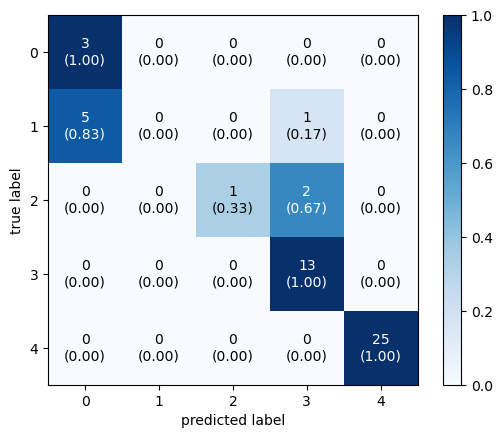

              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.00      0.00      0.00         6
           2       1.00      0.33      0.50         3
           3       0.81      1.00      0.90        13
           4       1.00      1.00      1.00        25

    accuracy                           0.84        50
   macro avg       0.64      0.67      0.59        50
weighted avg       0.79      0.84      0.80        50



C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pokem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knncross.predict(X_test_cross)
confusion_matrix = confusion_matrix(y_test_cross, y_pred)
print(confusion_matrix)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
print(classification_report(y_test_cross, y_pred))